In [1]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
root_dir = "../../eval_output/custom"

In [3]:
result_paths = [
    # deep dense mpeg4
    "scale-1.0/mpeg4/deep/dense/2019-11-08_04-15-42_model_highest_iou/iou-thres-0.1",
    # deep dense h264
    "scale-1.0/h264/deep/dense/2019-11-12_05-17-34_model_highest_iou/p/iou-thres-0.1",
    "scale-1.0/h264/deep/dense/2019-11-19_16-16-13_model_highest_iou/p+b/iou-thres-0.1",
    # deep upsampled mpeg4
    "scale-1.0/mpeg4/deep/upsampled/2019-10-30_02-47-42_model_highest_iou/iou-thres-0.1",
    # deep upsampled h264
    "scale-1.0/h264/deep/upsampled/2019-10-29_09-35-25_model_lowest_loss/p/iou-thres-0.1",
    # baseline mpeg4
    "scale-1.0/mpeg4/baseline/iou-thres-0.1",
    # baseline h264
    "scale-1.0/h264/baseline/p/iou-thres-0.1",
    "scale-1.0/h264/baseline/p+b/iou-thres-0.1",
]

det_intervals = [2, 4, 6, 8, 10, 15, 20]

In [4]:
motas = np.zeros((len(result_paths), len(det_intervals))) # models in result_paths, det_intervals
fps = np.zeros((len(result_paths), len(det_intervals)))
model_names = []

def load(path):
    # load MOTA
    mot_metrics = pickle.load(open(os.path.join(path, "mot_metrics.pkl"), "rb"))
    motas[r, d] = mot_metrics.loc['OVERALL', 'mota']

    # load FPS
    fps_csv = pd.read_csv(os.path.join(path, "time_perf.log"), delimiter=",")
    fps[r, d] = fps_csv.iloc[-1, 0]
    return motas, fps

for r, result_path in enumerate(result_paths):
    codec, tracker_type = str.split(result_path, "/")[1:3]
    if tracker_type == "deep":
        mvs_mode, model_name = str.split(result_path, "/")[3:5]
    elif tracker_type == "baseline":
        model_name = "_".join(["baseline", codec])    
    model_names.append(model_name)
    
    for d, det_interval in enumerate(det_intervals):
        
        #if mvs_mode == "upsampled" and det_interval not in [4, 15]:
        #    motas[r, d] = np.nan
        #    fps[r, d] = np.nan
        #    continue
        
        path = os.path.join(root_dir, result_path, "det-interval-{}".format(det_interval)).replace("\\","/")
        print(path)
        
        mot_metrics = pickle.load(open(os.path.join(path, "mot_metrics.pkl").replace("\\","/"), "rb"))
        motas[r, d] = mot_metrics.loc['OVERALL', 'mota']
        fps_csv = pd.read_csv(os.path.join(path, "time_perf.log"), delimiter=",")
        fps[r, d] = fps_csv.iloc[-1, 0]

../../eval_output/custom/scale-1.0/mpeg4/deep/dense/2019-11-08_04-15-42_model_highest_iou/iou-thres-0.1/det-interval-2
../../eval_output/custom/scale-1.0/mpeg4/deep/dense/2019-11-08_04-15-42_model_highest_iou/iou-thres-0.1/det-interval-4
../../eval_output/custom/scale-1.0/mpeg4/deep/dense/2019-11-08_04-15-42_model_highest_iou/iou-thres-0.1/det-interval-6


ValueError: could not convert string to float: 'Mean of total runtime:'

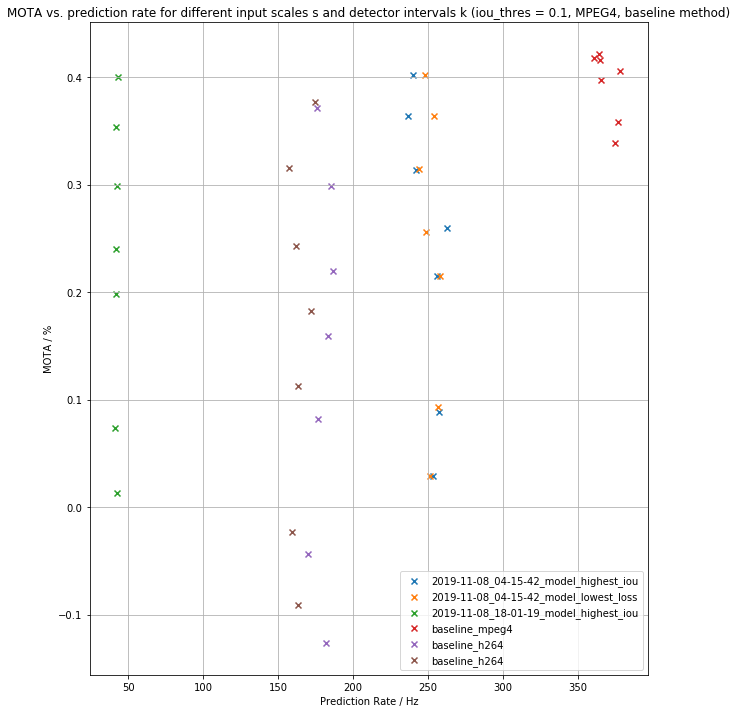

In [11]:
f, ax = plt.subplots(1, 1, figsize=(10, 12))
for model in range(motas.shape[0]):
    ax.scatter(fps[model, :], motas[model, :], marker="x")
    #ax.errorbar(np.mean(fps[model, :]), np.mean(motas[model, :]), xerr=np.std(fps[model, :]), yerr=np.std(motas[model, :]), fmt="", color="gray")

#ax.set_xlim([0.5, 1.5])
#ax.set_ylim([0.3, 0.4])
ax.legend(model_names)
ax.set_xlabel("Prediction Rate / Hz")
ax.set_ylabel("MOTA / %")
ax.set_title("MOTA vs. prediction rate for different input scales s and detector intervals k (iou_thres = 0.1, MPEG4, baseline method)")
ax.grid()


plt.show()